In [24]:
import numpy as np
import numpy.linalg as la
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

# Método numérico de diferencias Finitas.

Las diferencias finitas fueron introducidas por Brook Taylor en 1715, sin embargo el estudio de metodos similares también fue planteado como una alternativa al cálculo de infinitesimales. Las diferencias finitas son expresiones matemáticas que toman la forma

$$f(x+b) - f(x+a),$$

si dividimos la expresión anterior entre $b-a$ obtenemos el coeficiente finito. Mediante el uso de este objeto matemático se puede aproximar el valor de una función.

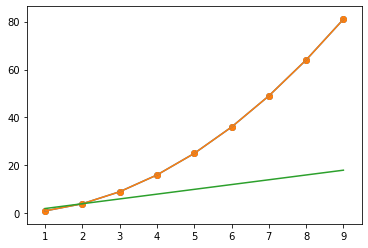

In [68]:
x = np.arange(1,10)
y = x**2

plt.plot(x,y)
plt.scatter(x,y)

y_dx = 2*x

plt.plot(x,y)
plt.scatter(x,y)

plt.plot(x,y_dx)

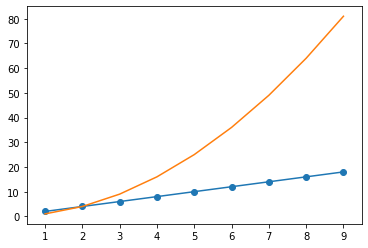

In [34]:
a = 0.001
b = 0.002
f_a = (x+a)**2
f_b = (x+b)**2
y_r = (f_b - f_a)/(b-a)
plt.plot(x, y_r)
plt.scatter(x,y_r)
plt.plot(x, y)

En el ejemplo anterior vimos que es posible utilizar diferencias finitas para aproximar el valor de la derivada.

Como método numérico se utiliza también para obtener aproximaciones a soluciones de ecuaciones diferenciales, esto se debe a que en la práctica existen ecuaciones y modelos a los que resulta imposible o 'no práctico' bien sea por el costo-beneficio de hallar una solución análitica. 
 
El método númerico se resume en cierto modo transformar un problema de cálculo a un problema que se puede resolver mediante el álgebra, para ello se discretiza el problema. Discretizar consiste en dividir el problema original en problemas con un dominio delimitado, por ejemplo, como en las gráficas que acabamos de producir, no es posible para un computador graficar cada parte que corresponde a la función debido a la existencia de numeros entre cada intervalo, lo que el computador hace es tomar los puntos que definimos y traza una linea entre estos dos, en cierto modo para poder ver la gráfica perdimos visibilidad de algunos puntos que no consideramos, precisamente porque en este caso queríamos hacernos una idea del comportamiento de la función.

Dependiendo del dominio del problema se elige la manera de discretizar el problema, como en el anterior, elegimos separarlos por unidades, pero también pudimos haber elegido aumentar o disminuir estos puntos o elegir tener mas puntos en una zona y en otra no

Text(0.5, 1.0, '(4)')

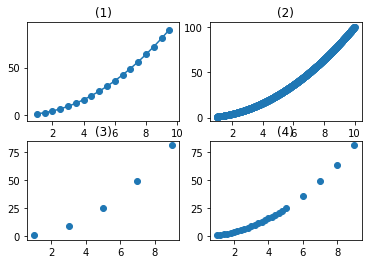

In [50]:
x = np.arange(1,10,0.5)
x_2 = np.arange(1,10,0.01)
x_3 = np.arange(1,10,2)
x_4 = np.concatenate([np.arange(1,5,0.2), np.arange(5,10,1)])

y = x**2

ax = plt.subplot(2, 2, 1)
ax.plot(x,y)
ax.scatter(x,y)
ax.set_title("(1)")

ax = plt.subplot(2, 2, 2)
ax.scatter(x_2, x_2**2)
ax.set_title("(2)")

ax = plt.subplot(2, 2, 3)
ax.scatter(x_3, x_3**2)
ax.set_title("(3)")

ax = plt.subplot(2, 2, 4)
ax.scatter(x_4, x_4**2)
ax.set_title("(4)")

De igual manera durante los cálculos podríamos elegir también ajustar esta dispocisión, en esta guía me centraré en una dispocisión uniforme como en las gráficas (1), (2) y (3).

Existen tres clasificaciones de los métodos de diferencias finitas:
-  Diferencia progresiva:
$$\Delta_h [f](x)= f(x+h) - f(x)$$
-  Diferencia regresiva:
$$\nabla_h [f](x)= f(x) - f(x-h)$$
-  Diferencia central:
$$\delta_h [f](x)= f\left(x + \frac{h}{2}\right) - f\left(x - \frac{h}{2}\right)$$

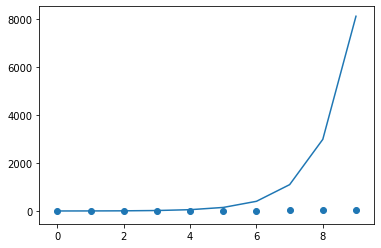

In [64]:
#Solver
# approx f' = f
# f(0) = 1
# analytical solution e^x
h = 0.5

iterations = 10

f_k = 1
f = [f_k]
for i in range(iterations):
    f_kp1 = (1 + h)*f_k
    f_k = f_kp1
    f.append(f_kp1)

x = np.arange(0, 10)
y = np.exp(x)

y_2 = f

plt.plot(x,y)
plt.scatter(x, f[1:])


---------------------Iteration  1 : dt= 0.00030842513753404245 h=1/ 4
array([0.38262517, 0.70699888, 0.92273942])
array([0.3815203 , 0.7049576 , 0.92107149])
---------------------Iteration  2 : dt= 7.710628438351061e-05 h=1/ 8
array([0.19508282, 0.38266873, 0.55554888, 0.70707961, 0.83143766,
       0.92384378, 0.9797481 ])
array([0.19479362, 0.38210142, 0.55472529, 0.70603137, 0.83020506,
       0.92247444, 0.97929364])


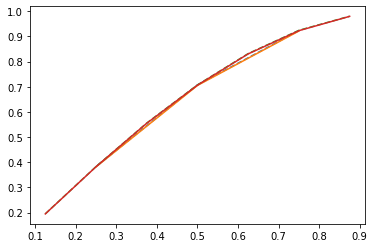

In [65]:
def explicit(I, dt, a, h, A, n, u_0):
    return np.dot(la.matrix_power(I + (dt*a/h**2)*A, n), u_0)

def exact_solution(t, x):
	return np.e**((-np.pi**(2)*t)/4)*np.sin((np.pi*x)/2)

# Diffusion coefficient
a=np.pi**-2
# Simulation parameters
dt=1/64
h=1/4

den = 4
iteration = 1

for iteration in range(1, 3):
    den = 2**(iteration+1)
    h = 1/den
    dt = ((h**2)/(2*a))*0.001
    print("---------------------Iteration ", iteration, ": dt=", dt,"h=1/",den)
    exact = np.asarray([exact_solution(den*dt, h*i) for i in range(1,den)])
    I = np.diag([1]*(den-1))
    # Diagonal matrix with -2 in its diagonal.	
    A = np.diag([-2]*(den-1)) + np.diag([1]*(den-2),-1) + np.diag([1]*(den-2),1)
    #Initial solution
    u_0 = np.sin([(np.pi*h*i)/2 for i in range(1,den)])
    estimated_solution = explicit(I, dt, a, h, A, 2, u_0)

    pprint(estimated_solution)
    pprint(exact)

    x = np.asarray([h*i for i in range(1,den)])
    plt.plot(x, estimated_solution, '--')

    plt.plot(x, exact)

plt.show()